Day - 7

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [47]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-2.5-32b")
result = llm.invoke(messages)
result

AIMessage(content="To see orcas (also known as killer whales) in the United States, the Pacific Northwest is particularly renowned for its high chance of encountering these magnificent creatures. Here are a few spots known for orca sightings:\n\n1. **San Juan Islands, Washington**: This area is home to the Southern Resident killer whale population, which consists of three pods (J, K, and L pods). Whale watching tours are very popular here, especially during the summer months when salmon, the orcas' primary food source, are abundant.\n\n2. **Seattle, Washington**: From Seattle, you can take boat tours to the San Juan Islands or to the nearby waters of Puget Sound, where orcas can sometimes be seen.\n\n3. **Olympic Coast National Marine Sanctuary, Washington**: This sanctuary is another prime location to spot orcas, as well as other marine life. However, the sightings here can be less predictable compared to the San Juan Islands.\n\n4. **Seward, Alaska**: Although it's not in the contigu

In [79]:
def add(a:int, b:int):
    """Add a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

In [49]:
llm_with_tool = llm.bind_tools([add])

In [50]:
tool_call = llm_with_tool.invoke([HumanMessage(content="add 3 and 2", name="d9")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0fjc', 'function': {'arguments': '{"a": 3, "b": 2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 172, 'total_tokens': 197, 'completion_time': 0.125, 'prompt_time': 0.010397389, 'queue_time': 0.207904503, 'total_time': 0.135397389}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5c570c8f-a7c2-4e50-9292-a04f8a020a7e-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 2}, 'id': 'call_0fjc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 172, 'output_tokens': 25, 'total_tokens': 197})

In [51]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 3, 'b': 2},
  'id': 'call_0fjc',
  'type': 'tool_call'}]

In [52]:
from typing import TypedDict, Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages


class MessageState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

function of add_messages

In [53]:
initial_message=[AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on generative ai.", name="D9")
                   ]
# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

add_messages(initial_message,new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='95616d31-c8fc-49b0-8bb2-76d70d3fd352'),
 HumanMessage(content="I'm looking for information on generative ai.", additional_kwargs={}, response_metadata={}, name='D9', id='d936ee7d-0279-4c09-939b-0a9bf228fc0a'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='6a5271f6-1a1d-47ce-a387-e43e1cb810da')]

In [100]:
# Creating a node..
def tool_call_llm(state:MessageState):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}

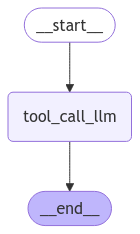

In [60]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(MessageState)

# Adding a node..
builder.add_node("tool_call_llm", tool_call_llm)

# create a graph..
builder.add_edge(START, "tool_call_llm")
builder.add_edge("tool_call_llm", END)

#compile the graph..
graph = builder.compile()

graph

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Hi I am Darshan an AI Engineer")})
messages

{'messages': [HumanMessage(content='Hi I am Darshan aN AI Engineer', additional_kwargs={}, response_metadata={}, id='7d9d4252-6965-4934-adf4-d0ac81aa8312'),
  AIMessage(content="Hello Darshan! It's nice to meet you. As an AI Engineer, what projects are you currently working on, or do you have any questions about AI engineering that you'd like to discuss?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 175, 'total_tokens': 216, 'completion_time': 0.205, 'prompt_time': 0.010437499, 'queue_time': 0.203250013, 'total_time': 0.215437499}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-08e8662f-f48c-49a8-9099-aae65fd0b47b-0', usage_metadata={'input_tokens': 175, 'output_tokens': 41, 'total_tokens': 216})]}

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="add 1 and 2")})

In [74]:
for msg in messages["messages"]:
    msg.pretty_print()

================================ Human Message =================================

add 1 and 2
================================== Ai Message ==================================
Tool Calls:
  add (call_kt2z)
 Call ID: call_kt2z
  Args:
    a: 1
    b: 2


Till now llm knows when and which tool to execute...Now we are going to make a tool to be a node. And then we will add condition so that llm can route to that tool and execute it. fot that wee need to use ToolNode and tools_condition from prebuilt in langgraph

tools

Note: Function must have a docstring if description not provided.

In [ ]:
# Note Function must have a docstring if description not provided.
def add(a:int, b:int):
    """Add a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

In [ ]:
llm_with_tool = llm.bind_tools([add])

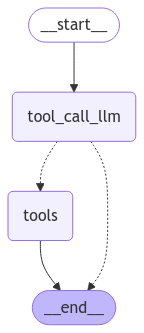

In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition


builder = StateGraph(MessageState)

# Adding a node..
builder.add_node("tool_call_llm", tool_call_llm)
builder.add_node("tools", ToolNode([add]))

# create a graph..
builder.add_edge(START, "tool_call_llm")
builder.add_conditional_edges("tool_call_llm", tools_condition)
# If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
# If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
builder.add_edge("tools", END)

#compile the graph..
graph = builder.compile()

graph

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="add 1 and 2")})

In [102]:
for msg in messages["messages"]:
    msg.pretty_print()

================================ Human Message =================================

add 1 and 2
================================== Ai Message ==================================
Tool Calls:
  add (call_pacv)
 Call ID: call_pacv
  Args:
    a: 1
    b: 2
================================= Tool Message =================================
Name: add

3


# let's create the whole process with 2 tools
add and multi

llm

In [103]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-2.5-32b")

tools

In [104]:
# Note Function must have a docstring if description not provided.
def add(a:int, b:int):
    """Add a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def multi(a:int, b:int):
    """multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

connect tools with llm

In [114]:
llm_with_tool = llm.bind_tools([add, multi])

create a class to build the structure for message and context awareness...

In [115]:
from typing import TypedDict, Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages


class MessageState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

create a node for llm which is taking message from dictionary and return a dictionary of messages for the history

In [116]:
# Creating a node..
def tool_call_llm(state:MessageState):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}

Build the graph..

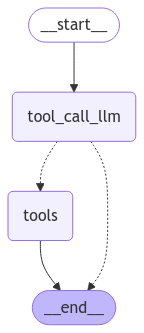

In [117]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition


builder = StateGraph(MessageState)

# Adding a node..
builder.add_node("tool_call_llm", tool_call_llm)
builder.add_node("tools", ToolNode([add, multi]))

# create a graph..
builder.add_edge(START, "tool_call_llm")
builder.add_conditional_edges("tool_call_llm", tools_condition)
# If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
# If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
builder.add_edge("tools", END)

#compile the graph..
graph = builder.compile()

graph

In [128]:
messages = graph.invoke({"messages": HumanMessage(content="add 3 and 4 then multiply by 2 and then muliply by 5")})
for msg in messages["messages"]:
    msg.pretty_print()

================================ Human Message =================================

add 3 and 4 then multiply by 2 and then muliply by 5
================================== Ai Message ==================================
Tool Calls:
  add (call_jqkn)
 Call ID: call_jqkn
  Args:
    a: 3
    b: 4
  multi (call_bjk9)
 Call ID: call_bjk9
  Args:
    a: 7
    b: 2
  multi (call_r3dj)
 Call ID: call_r3dj
  Args:
    a: 14
    b: 5
================================= Tool Message =================================
Name: add

7
================================= Tool Message =================================
Name: multi

14
================================= Tool Message =================================
Name: multi

70
